In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn import datasets

In [24]:
df = datasets.load_wine()
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [11]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df.data, df.target, test_size=0.3, random_state=0)

In [15]:
# instanciando o modelo
redeneural = MLPClassifier(
    verbose=True,
    hidden_layer_sizes=(5,4,3),
    activation='relu',
    batch_size=50,
    learning_rate='adaptive',
    momentum=0.9,
    early_stopping=False,
    max_iter=1000,
    random_state=10,
)

# treinando o modelo
redeneural.fit(X_treino, y_treino)

Iteration 1, loss = 24.12559313
Iteration 2, loss = 23.95641535
Iteration 3, loss = 23.83138779
Iteration 4, loss = 23.59960359
Iteration 5, loss = 23.20859565
Iteration 6, loss = 22.76590268
Iteration 7, loss = 22.19266116
Iteration 8, loss = 21.50823108
Iteration 9, loss = 20.81688930
Iteration 10, loss = 19.94628615
Iteration 11, loss = 18.93401067
Iteration 12, loss = 17.66055777
Iteration 13, loss = 16.32169522
Iteration 14, loss = 14.99777473
Iteration 15, loss = 13.50048546
Iteration 16, loss = 11.93235035
Iteration 17, loss = 10.27711665
Iteration 18, loss = 8.65742408
Iteration 19, loss = 7.14080689
Iteration 20, loss = 5.83296541
Iteration 21, loss = 4.69795781
Iteration 22, loss = 3.76372032
Iteration 23, loss = 3.02726531
Iteration 24, loss = 2.41357695
Iteration 25, loss = 2.01156486
Iteration 26, loss = 1.67957251
Iteration 27, loss = 1.46044506
Iteration 28, loss = 1.29036985
Iteration 29, loss = 1.20914075
Iteration 30, loss = 1.15648971
Iteration 31, loss = 1.12488738


MLPClassifier(batch_size=50, hidden_layer_sizes=(5, 4, 3),
              learning_rate='adaptive', max_iter=1000, random_state=10,
              verbose=True)

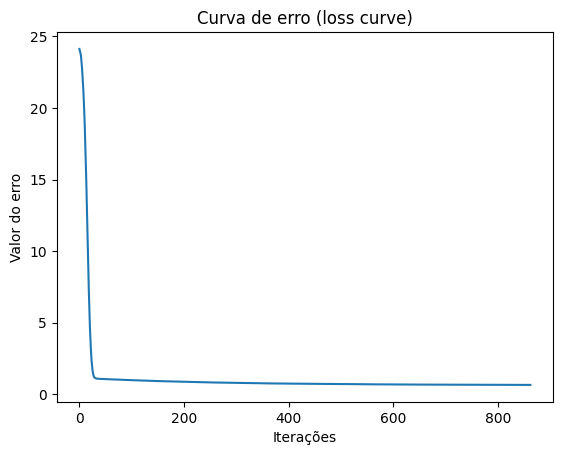

In [26]:
# plotando a função de loss
plt.plot(redeneural.loss_curve_)
plt.xlabel("Iterações")
plt.ylabel("Valor do erro")
plt.title("Curva de erro (loss curve)")
plt.show()

In [21]:
def evaluate_model(model, X_test, y_test):
 y_pred = model.predict(X_test)
 cm = confusion_matrix(y_test, y_pred)
 ConfusionMatrixDisplay(confusion_matrix=cm).plot()
 plt.show()
 accuracy = accuracy_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred, average='weighted')
 print(f"Acurácia: {accuracy * 100:.2f}%")
 print(f"F1-score: {f1:.2f}")

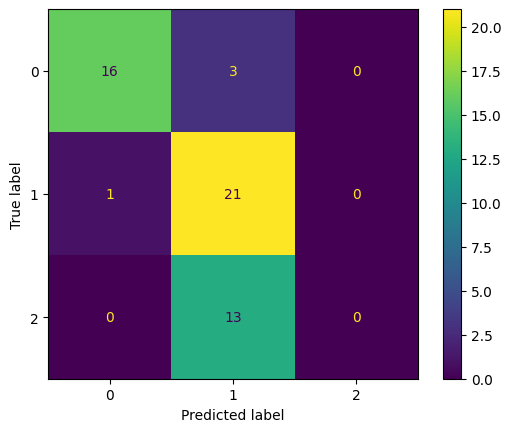

Acurácia: 68.52%
F1-score: 0.60


In [22]:
evaluate_model(redeneural, X_teste, y_teste)